# Task 6.6 - Sourcing & Analyzing Time Series Data

This notebook contains a Time Series analysis on Quandl data - this does not use the Airbnb data as there was no time component in this data set. Another data source was sourced instead - Canadian Consumer Price index data from Quandl.

1. Installing Quandl library
2. Finding & Importing data using an API key
3. Checking the data
4. Decomposing the data components - Trend, Seasonal, and Residual
5. Running Dickey-Fuller test
6. Checking for autocorrelations and running a round of differencing

## Task Step 1 - Install Quandl library

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

## Task Step 2 - Find & Import Data Set

In [2]:
# Configure API key
quandl.ApiConfig.api_key = 'Dz2ZGehgGFR-GSVQYvra'

In [5]:
# Importing Canadian Consumer Price Index - this is the "whole value" (rather than the monthly change) calculation posted by Statistics Canada
# Note - I attempted to find a Real Estate data set relevant to my project, 
# however given the specificity of the Airbnb data for Vancouver, I chose to take a look at something else I'm interested in for this assignment!
data = quandl.get('RATEINF/CPI_CAN')

In [6]:
data.head()

,Value
Date,
1989-01-31,72.7
1989-02-28,73.2
1989-03-31,73.6
1989-04-30,73.8
1989-05-31,74.6


In [8]:
data.shape

(415, 1)

In [9]:
data.columns

Index(['Value'], dtype='object')

## Task Step 3 - Subset of data

I chose not to take a subset of this data, as I'd like to see the information back to the late 80s. It would be different if the data dates back to 1950 or earlier, but I think 1989 is still relevant for this analysis.

## Task Step 4 - Create a linechart

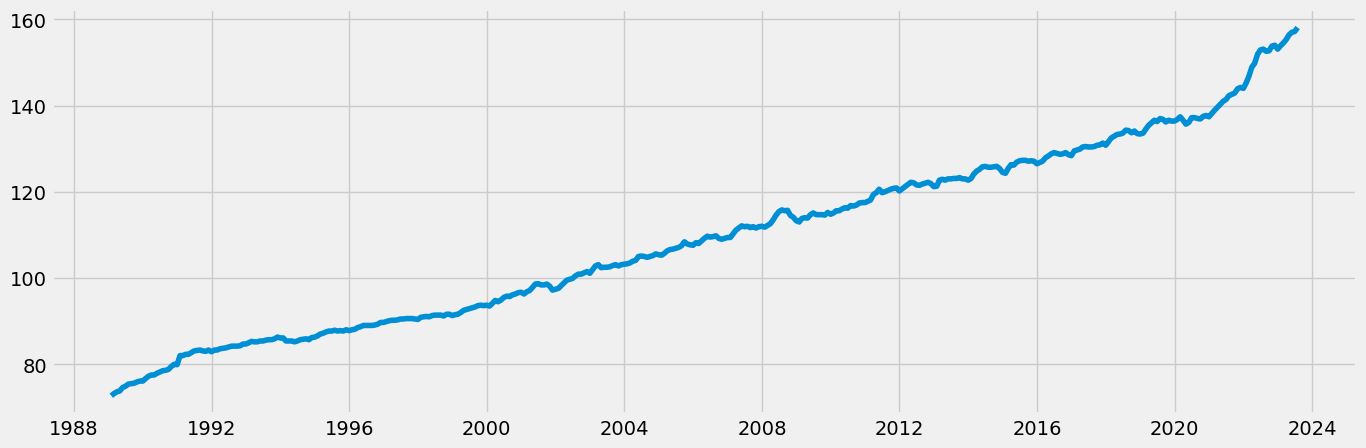

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

## Task Step 5 - Decompose data components

In [11]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [12]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

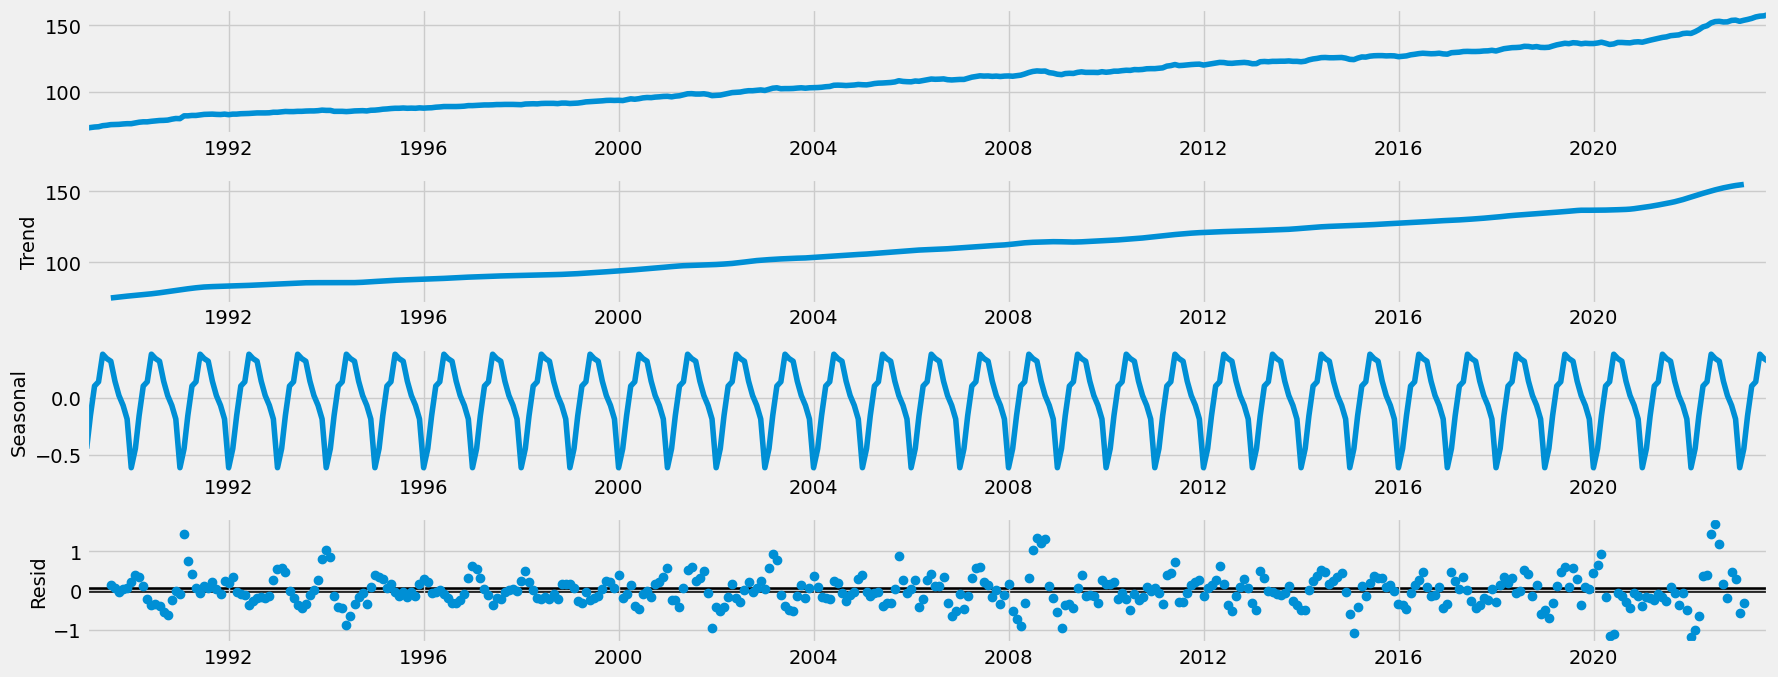

In [13]:
# Plot separate components

decomposition.plot()
plt.show()

There is a upward linear trend in the Consumer Price Index data, which appears similar to the level as this data did not require smoothing. We can also see from the decomposition that there is seasonality present in this data, represented by the spiked curve that changes at regular intervals. Finally, the residual chart shows the noise of the data, which I think as the plots are fairly closely centered around zero, there isn't an immense amount. 

## Task Step 6 - Dickey-Fuller test

In [14]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.759494
p-value                          0.998265
Number of Lags Used             12.000000
Number of Observations Used    402.000000
Critical Value (1%)             -3.446722
Critical Value (5%)             -2.868757
Critical Value (10%)            -2.570614
dtype: float64


The test statistic is larger than the critical value, so we must stationarize the data.

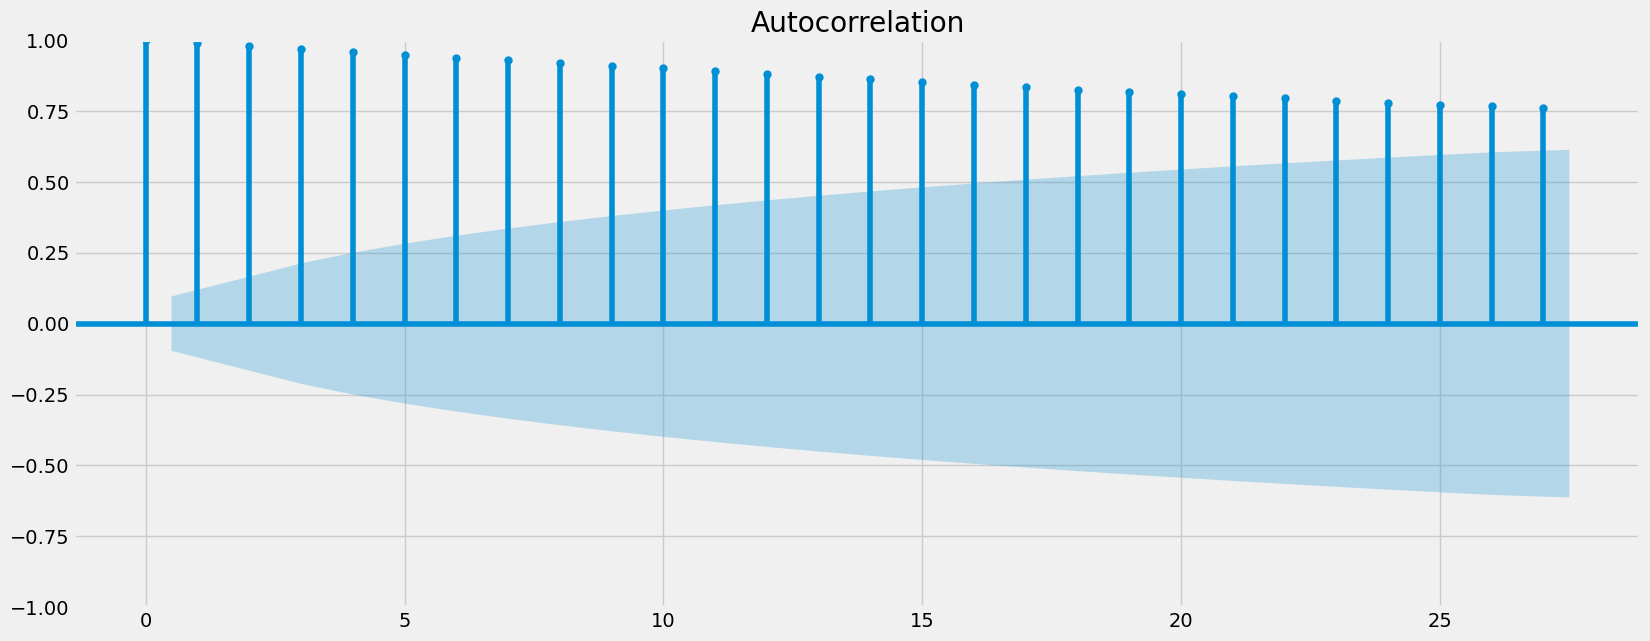

In [15]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

There are many lags above the confidence interval edge, which means there are many lags significantly correlated with each other (or there is a lot of autocorrelated data, supporting the result of the Dickey-Fuller test)

## Task Step 7 - Round of differencing

In [16]:
data_diff = data - data.shift(1) 

In [17]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)

In [18]:
data_diff.head()

,Value
Date,
1989-02-28,0.5
1989-03-31,0.4
1989-04-30,0.2
1989-05-31,0.8
1989-06-30,0.3


In [19]:
data_diff.columns

Index(['Value'], dtype='object')

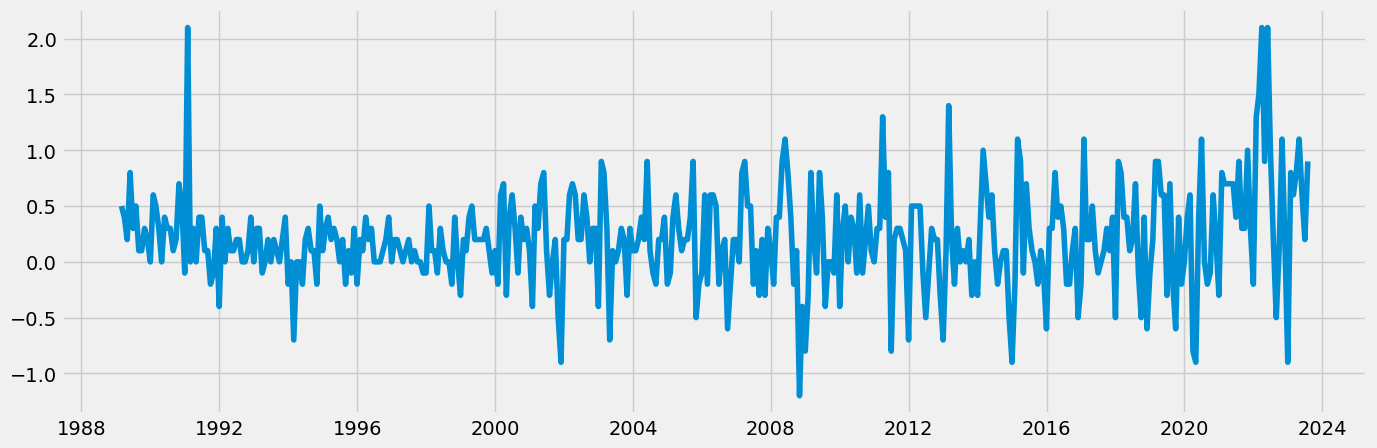

In [20]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [21]:
#Re-run Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.361735
p-value                          0.012335
Number of Lags Used             11.000000
Number of Observations Used    402.000000
Critical Value (1%)             -3.446722
Critical Value (5%)             -2.868757
Critical Value (10%)            -2.570614
dtype: float64


Test statistic is now smaller than both the 5% and 10% Critical Values

## Task Step 8 - Additional round of differencing - unnecessary

## Task Step 9 - Autocorrelations

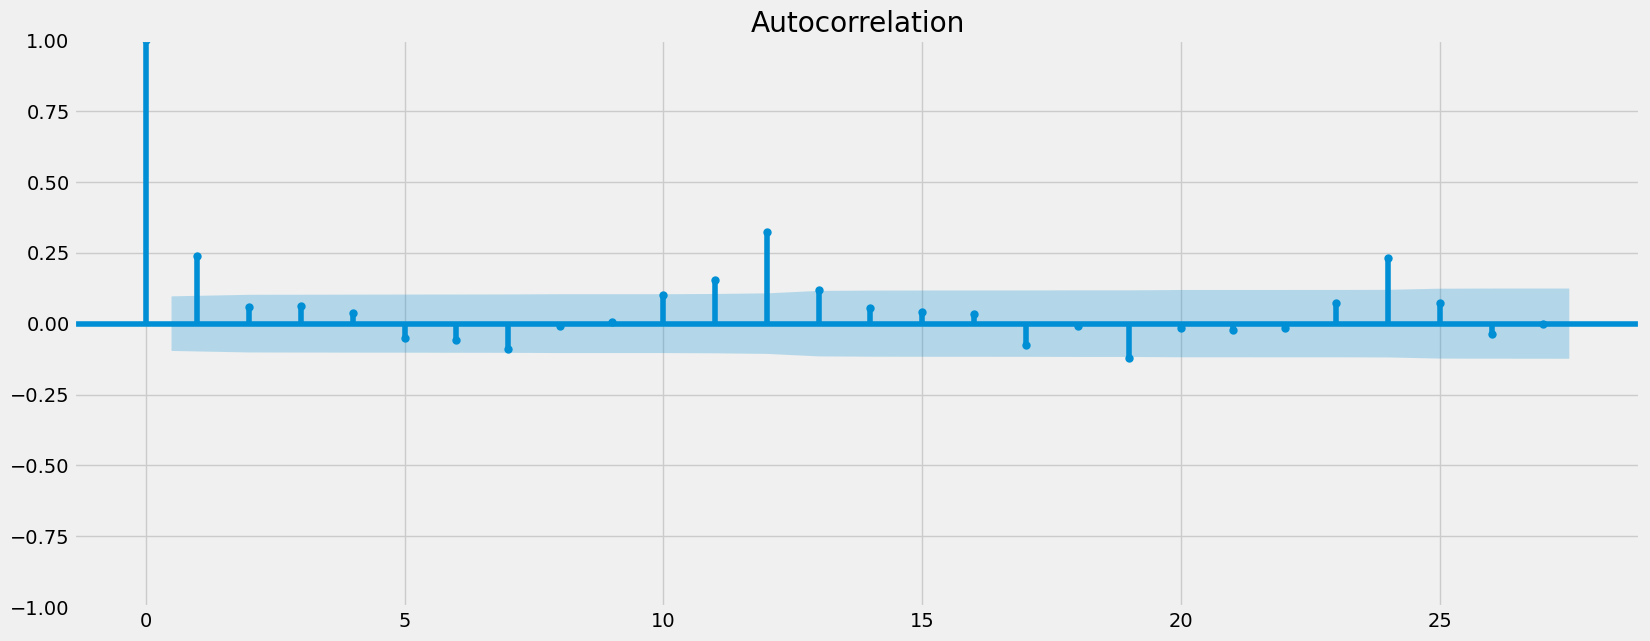

In [22]:
plot_acf(data_diff)
plt.show()

While there are still a few lags above the blue confidence interval, there are less than 10 of them so I will choose to stop here!